Two degrees of freedom model

The equations of motion are:

$\quad m_1 \ddot{x}_1 + (k_1+k_2)x_1 - k_2 x_2 = 0$

$\quad m_2 \ddot{x}_2 - k_2 x_1 + (k_2 + k_3)x_2 = 0$

Also expressed in matrix form as:

$\quad \begin{bmatrix}m_1 & 0 \\ 0 & m_2\end{bmatrix}\begin{bmatrix}\ddot{x}_1 \\ \ddot{x}_2\end{bmatrix} +  \begin{bmatrix}k_1 + k_2 & -k_2 \\ -k_2 & k_2 + k_3\end{bmatrix}\begin{bmatrix}x_1 \\ x_2\end{bmatrix} = \begin{bmatrix}0 \\ 0\end{bmatrix}$


Free vibration analysis solving the eigenvalue problem to get natural frequencies and modes, then solve numerically the equations of motion

In [2]:
import numpy as np                        # Import NumPy functions with as np
from scipy import linalg                  # Import module for linear algebra
# Display plots inline
%matplotlib inline 
import matplotlib.pyplot as plt

To obtain the natural frequencies and mode shapes consider harmonic motion to state the frequency equation as:

$\quad \left[K - \omega^2 M\right]\bar{X} = 0$

To solve it as an egienvalue problem, where the eigenvalues are the natural frequencies and the eigenvector are the mode shapes.


In [52]:
# Define the system parameters
# Example defines k1, k2, k3 to give the first natural frequency at 1 Hz
m1 = 1.0                # kg
m2 = 1.0                # kg
k1 = 1                  # N/m 
k2 = 1                  # N/m 
k3 = 1                 # N/m 
c1 = 0.0
c2 = 0.0
c3 = 0.0

In [53]:
# Define the mass, stiffness and damping matrices
M = np.asarray([[m1, 0],
                [0,  m2]])

K = np.asarray([[k1 + k2, -k2],
                [-k2,      k2 + k3]])

C = np.asarray([[c1 + c2, -c2],
                [-c2,      c2 + c3]])

In [54]:
omega_square, Modal_B = linalg.eigh(K, M)
# The linalg.eigh function returns two arrays, one of the eigenvalues and one of the eigenvectors. 
# The eigenvalues are the square of the two natural frequencies. 
# The eigenvectors are returned mass normalised.

print('\n')
print('\n')
print('The natural frequencies are {:.2f}rad/s and {:.2f}rad/s.'.format(np.sqrt(omega_square[0]), np.sqrt(omega_square[1])))
print('\n')

print('The modal matrix B is:')
def printArray(Modal_B):
    for row in Modal_B:
        for col in row:
            print("{:8.3f}".format(col), end=" ")
        print("")
printArray(Modal_B)






The natural frequencies are 1.00rad/s and 1.73rad/s.


The modal matrix B is:
  -0.707   -0.707 
  -0.707    0.707 


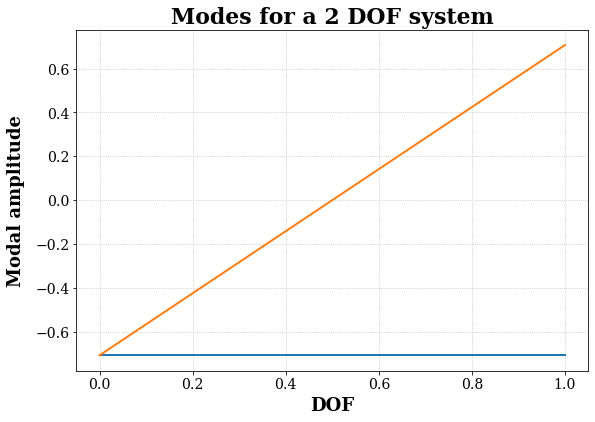

In [55]:
# Plot the modes

# Set format for figure and plot the results

# Set the plot size 
fig = plt.figure(figsize=(9, 6))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Modify the axis units
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=14)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=14)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Activate and edit the grid
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('DOF', family='serif', fontsize=18, weight='bold', labelpad=5)
plt.ylabel('Modal amplitude', family='serif', fontsize=18, weight='bold', labelpad=10)
plt.title("Modes for a 2 DOF system",  family='serif', fontsize=22, weight='bold')

# Plot the response of DOF 1 and 2
plt.plot(Modal_B[:,0],linewidth=2,label=r'Mode 1')
plt.plot(Modal_B[:,1],linewidth=2,label=r'Mode 2')

# uncomment below and set limits if needed

Modal decomposition is performed based on the orthogonality between the modal matrix and the mass and stifness matrices. As a result, the M and K matrices are diagonalized.

$\mathbf{B}^T\mathbf{M}\mathbf{B}=diag(\mathbf{M})_j$


$\mathbf{B}^T\mathbf{K}\mathbf{B}=diag(\mathbf{K})_j$

This results in a set of diagonal modal M and K matrices, effectively channging the physical DOFs to modal DOFs resulting from the linear transformation. As a result we now have a set of two independent SDOF systems, that represent the response of the original system by modal summation of their idependent responses. The natural frequencies of the decomposed system correspond to those of the original system. This is particulary useful for forced vibration


In [64]:
Mj = np.transpose(Modal_B) @ M @ Modal_B

print('The modal mass is:')
print(Mj)

Kj = np.transpose(Modal_B) @ K @ Modal_B

print('The modal stiffness is:')
print(Kj)


print('The natural frequencies are {:.2f}rad/s and {:.2f}rad/s.'.format(np.sqrt(Kj[0,0]/Mj[0,0]), np.sqrt(Kj[1,1]/Mj[1,1])))


The modal mass is:
[[1. 0.]
 [0. 1.]]
The modal stiffness is:
[[1. 0.]
 [0. 3.]]
The natural frequencies are 1.00rad/s and 1.73rad/s.


Considering proportional damping in the system, the modal damping can be obtained through the same modal decomposition procedure.

$\mathbf{B}^T\mathbf{C}\mathbf{B}=diag(\mathbf{C})_j$


In [65]:
Cj = np.transpose(Modal_B) @ C @ Modal_B

print('The modal damping is:')
print(Cj)



The modal damping is:
[[0. 0.]
 [0. 0.]]


The new set of equations for the decomposed/uncoupled systems is:

$diag(\mathbf{M}_j)\vec{\ddot{y}} + diag(\mathbf{C}_j)\vec{\dot{y}}+  diag(\mathbf{K}_j)\vec{y}=0$

Let´s consider now a external harmonic force that can be applied in any of the DOFs in a vector form

$\vec{f}=\begin{bmatrix}f_1 \\ f_2\end{bmatrix}$


In [66]:
# Define the input force
f1 = 1.0                # N
f2 = 0.0                # N


force = [[f1], 
        [f2]]  

f = np.array(force)
print(f)

[[1.]
 [0.]]


The modal force $\vec{q}$ is how much force "corresponds" to each decomposed system

$\mathbf{B}^T\vec{f}=\vec{q}$

The resulting equations of motion are:

$diag(\mathbf{M}_j)\vec{\ddot{y}} + diag(\mathbf{C}_j)\vec{\dot{y}}+  diag(\mathbf{K}_j)\vec{y}=\vec{q}$


As a result, the modal FRF (uncoupled) $\frac{y_j}{q_j}$, can be expressed as again, for proportional damping:

$\frac{y_j}{q_j}=diag(\frac{1}{\mathbf{K}_j -\omega^2 \mathbf{M}_j + i \omega \mathbf{C}_j})$

And the physical receptances of the original system can be expressed by modal summation and adding the individual receptances corresponding to each mode contribution

$\alpha_{re}=\mathbf{B} diag(\frac{1}{\mathbf{K}_j -\omega^2 \mathbf{M}_j + i \omega \mathbf{C}_j }) \mathbf{B^T}$

This results in a nxn matrix of receptances $\alpha_{re}$ for excitation at DOF e and response at DOF r, where the columsn represent the input DOFs and the rows the response DOFs.

$\alpha_{re}=\frac{X_r}{F_e}=\begin{bmatrix} \alpha_{11} & \alpha_{12} & ... & \alpha_{1r} \\ \alpha_{21} & \alpha_{22} & ... &  \\ \alpha_{e1} & ... & ... & \alpha_{re}  \\\end{bmatrix}$

In general, the FRF of a MDOF system can be expressed as:

$\alpha_{re}=\sum_{j=1}^{j=n} \phi_{rj}\ \phi_{ej}\frac{1}{K_j -\omega^2 M_j + i \omega C_j }$

Where the product $\phi_{rj}\ \phi_{ej}$ is called the modal constant and means how the mode $j$ responds in the DOF $r$ and how easily the mode $j$ is excited by a force in the DOF $e$. The modal matrix is obtained by the modal sumation. i.e. 

$\mathbf{B}\mathbf{B^T}=\begin{bmatrix} \phi_{11}\phi_{11} + \phi_{12}\phi_{12} & \phi_{11}\phi_{21} + \phi_{12}\phi_{21}
\\ \phi_{21}\phi_{11} + \phi_{22}\phi_{12} & \phi_{21}\phi_{21} + \phi_{22}\phi_{22}&  \end{bmatrix}
$

For example, point and transfer receptances for the 2 DOF mofel can be expressed as:

$\alpha_{11}=\frac{\phi_{11}\ \phi_{11}}{K_{j1} -\omega^2 M_{j1} + i \omega C_{j1}}+ \frac{\phi_{12}\ \phi_{12}}{K_{j2} -\omega^2 M_{j2} + i \omega C_{j2}}$

$\alpha_{21}=\frac{\phi_{21}\ \phi_{11}}{K_{j1} -\omega^2 M_{j1} + i \omega C_{j1}}+ \frac{\phi_{22}\ \phi_{12}}{K_{j2} -\omega^2 M_{j2} + i \omega C_{j2}}$



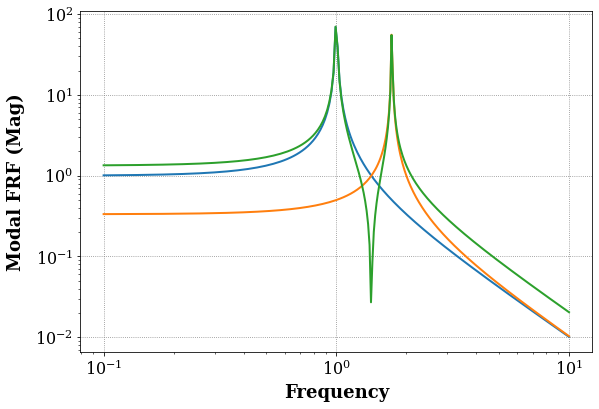

In [115]:
# Calculate and plot modal FRFs

# Extract the modal mass, stiffness and damping

mj=np.diagonal(Mj)
kj=np.diagonal(Kj)
cj=np.diagonal(Cj)

# Define the frequency vector
w = np.linspace(0.1,10,500)
FRF_modal = np.zeros((len(w),2),dtype=complex)

# Calculate modal FRFs

for ii, omega in enumerate(w):
    FRF_modal[ii,:] = (1/(kj-mj*omega**2 + 1j*omega*cj))

# Summ both modal FRfs

FRF_sum=(FRF_modal[:,0]+FRF_modal[:,1])

# Plot the magnitude

# Change the size of plot
fig = plt.figure(figsize=(9,6))

# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Frequency',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('Modal FRF (Mag)',family='serif',fontsize=18,weight='bold',labelpad=10)


plt.loglog(w,np.abs(FRF_modal[:,0]),linewidth=2,label=r'$\bar{x}$')
plt.loglog(w,np.abs(FRF_modal[:,1]),linewidth=2,label=r'$\bar{x}$')
plt.loglog(w,np.abs(FRF_sum),linewidth=2,label=r'$\bar{x}$')




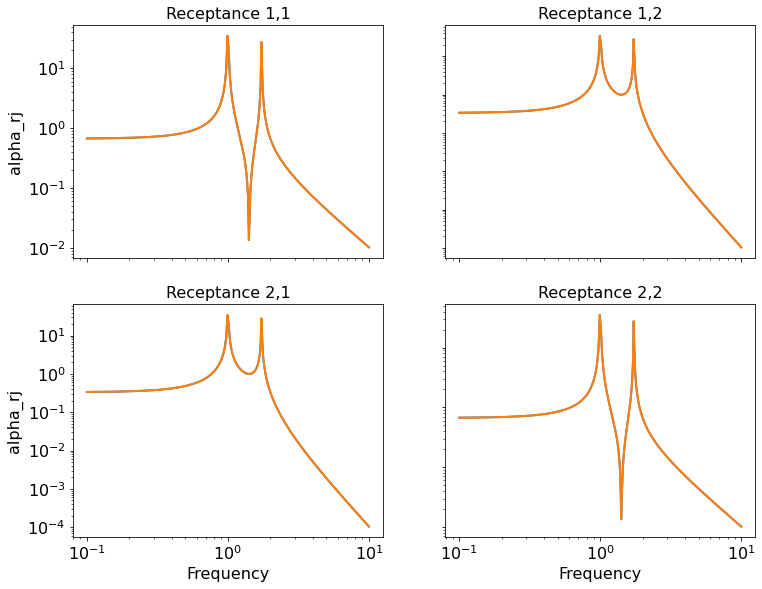

In [126]:
# Calculate and plot physical FRFs

# Perform modal summation

n = 2

DOFs= np.linspace(1,n,n)

# Define the frequency vector
w = np.linspace(0.1,10,500)
FRF_11 = np.zeros((len(w),2),dtype=complex)
FRF_21 = np.zeros((len(w),2),dtype=complex)
FRF_12 = np.zeros((len(w),2),dtype=complex)
FRF_22 = np.zeros((len(w),2),dtype=complex)

# Calculate the four receptances of the 2 DOF model

for ii, omega in enumerate(w):
    FRF_11[ii,:] = (Modal_B[0,0]*Modal_B[0,0])/(kj[0]-mj[0]*omega**2 + 1j*omega*cj[0]) + (Modal_B[0,1]*Modal_B[0,1])/(kj[1]-mj[1]*omega**2 + 1j*omega*cj[1])

for ii, omega in enumerate(w):
    FRF_21[ii,:] = (Modal_B[1,0]*Modal_B[0,0])/(kj[0]-mj[0]*omega**2 + 1j*omega*cj[0]) + (Modal_B[1,1]*Modal_B[0,1])/(kj[1]-mj[1]*omega**2 + 1j*omega*cj[1])

for ii, omega in enumerate(w):
    FRF_12[ii,:] = (Modal_B[0,0]*Modal_B[1,0])/(kj[0]-mj[0]*omega**2 + 1j*omega*cj[0]) + (Modal_B[0,1]*Modal_B[1,1])/(kj[1]-mj[1]*omega**2 + 1j*omega*cj[1])

for ii, omega in enumerate(w):
    FRF_22[ii,:] = (Modal_B[1,0]*Modal_B[1,0])/(kj[0]-mj[0]*omega**2 + 1j*omega*cj[0]) + (Modal_B[1,1]*Modal_B[1,1])/(kj[1]-mj[1]*omega**2 + 1j*omega*cj[1])

# Use subplots for graphs    
    
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



# Get current axes using gca
ax = plt.gca()
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

# Change the axis units to serif
# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

axs[0, 0].loglog(w,np.abs(FRF_11),linewidth=2,label=r'$\bar{x}$')
axs[0, 0].set_title('Receptance 1,1', fontsize = 16)
axs[0, 1].loglog(w,np.abs(FRF_12),linewidth=2,label=r'$\bar{x}$')
axs[0, 1].set_title('Receptance 1,2', fontsize = 16)
axs[1, 0].loglog(w,np.abs(FRF_21),linewidth=2,label=r'$\bar{x}$')
axs[1, 0].set_title('Receptance 2,1', fontsize = 16)
axs[1, 1].loglog(w,np.abs(FRF_22),linewidth=2,label=r'$\bar{x}$')
axs[1, 1].set_title('Receptance 2,2', fontsize = 16)
    
for ax in axs.flat:
    ax.set(xlabel='Frequency', ylabel='alpha_rj')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()    


